# Gradient descent
### Part 1

Plain vanilla gradient descent in one dimension.

First:
 - Choose a starting point 
 - Find the gradient at the starting point
 - If it is close to zero then stop
 - Otherwise iterate

Iterate as follows:
 - Take a small step in the downhill direction (opposite to the gradient)
 - Find the gradient
 - If it is close to zero then stop


In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

from gd import gd_1d

from mpl_toolkits.mplot3d import Axes3D

This notebook minimises the Three-Hump Camel function.

**Define Functions**

In [2]:
def fn_loss(x_1,x_2):
    return (2*(x_1**2))-(1.05*(x_1**4))+((x_1**6)/6)+(x_1*x_2)+(x_2**2)


def fn_grad(x_1,x_2):
    grad_1 = (x_1**5)-((21*x_1**3)/5)+(4*x_1)+x_2
    grad_2 = (2*x_2)+x_1
    return np.array([grad_1, grad_2])

**Illustrate the loss function**

In [3]:
print(fn_loss(0,0))
print(fn_grad(10,10))

0.0
[9.585e+04 3.000e+01]


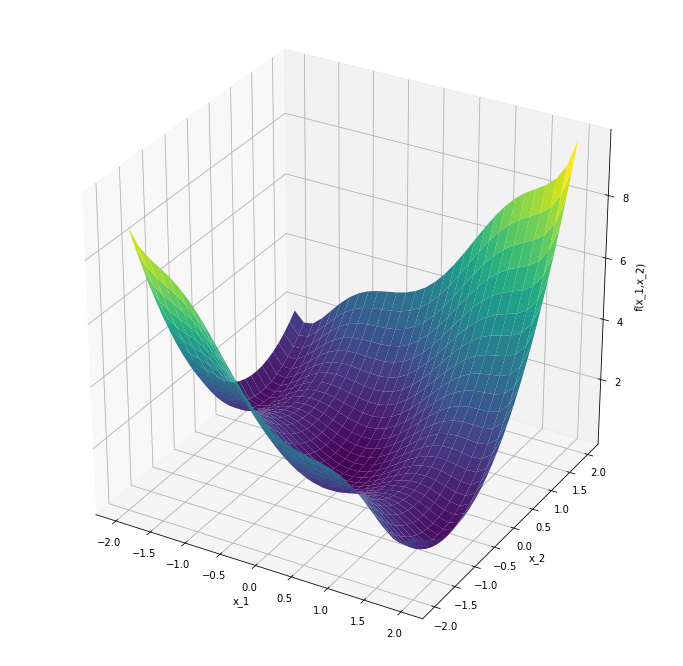

In [4]:
x = np.linspace(-2, 2, 30)
y = np.linspace(-2, 2, 30)

X, Y = np.meshgrid(x, y)
Z = fn_loss(X, Y)

fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('f(x_1,x_2)');

**Estimate the minimum with a brute force search**

In [5]:
x = np.arange(-100, 100, 0.01)
y = np.arange(-100, 100, 0.01)
z = fn_loss(x,y)
idx_min = np.argmin(z)
print("min x_1 = ",x[idx_min])
print("min x_2 = ",y[idx_min])
print("min z = ",z[idx_min])

min x_1 =  5.1159076974727213e-11
min x_2 =  5.1159076974727213e-11
min z =  1.0469004627624257e-20


**Define GD parameters**

In [6]:
x_1_init = 5
x_2_init = 5
n_iter = 200000
eta = 1e-4
tol = 1e-11
alpha = 0.95

**Gradient Descent: Plain Vanilla**

In [7]:
solver = gd_1d(fn_loss = fn_loss, fn_grad = fn_grad)
solver.pv(x_1_init = x_1_init, x_2_init = x_2_init, n_iter = n_iter, eta = eta, tol = tol)

Converged in 89166 steps.  Loss fn 3.1519484907815124e-12 achieved by x_1 = -7.62995303274776e-07 and x_2 = 1.8420336092050116e-06


Text(0.5, 0, 'z Label')

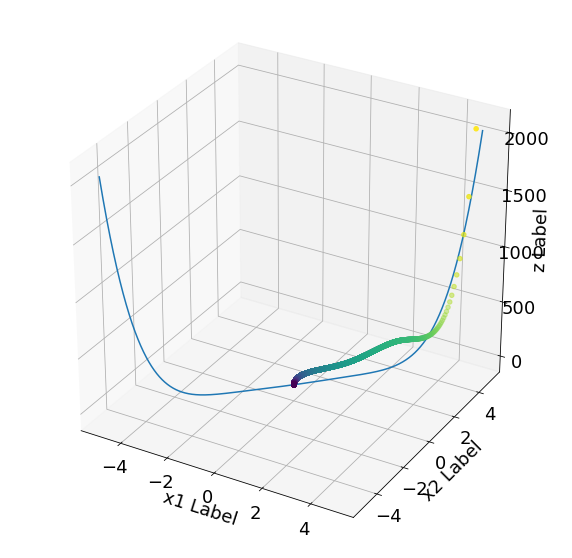

In [8]:
x_1_range = np.arange(-5, 5, 0.001)
x_2_range = np.arange(-5, 5, 0.001)
z_range = fn_loss(x_1_range,x_2_range)
font = {'size': 18}
matplotlib.rc('font', **font)


cmap = matplotlib.cm.get_cmap('viridis')
lst_loss_log = np.log(solver.loss_path - np.min(solver.loss_path) + 0.01)
normalize = matplotlib.colors.Normalize(vmin=min(lst_loss_log), 
                                        vmax=max(lst_loss_log))

colours = [cmap(normalize(value)) for value in lst_loss_log]

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111,projection='3d')

ax1.plot(x_1_range, x_2_range, z_range)
ax1.scatter(solver.x_path[:,0], solver.x_path[:,1], solver.loss_path, color=colours)

ax1.set_xlabel('x1 Label')
ax1.set_ylabel('x2 Label')
ax1.set_zlabel('z Label')

#ax1.view_init(azim=225)


#fig=plt.figure(figsize=(15,15))
#ax1 = fig.add_subplot(111,projection='3d')
#ax1.scatter(np.array(lst_x_1),np.array(lst_x_2),np.array(lst_loss), color='black')
#ax1.set_title('scatterplot');
#ax1.set_xlabel('x1 Label')
#ax1.set_ylabel('x2 Label')
#ax1.set_zlabel('z Label')

**Gradient Descent: Momentum**

In [9]:
solver = gd_1d(fn_loss = fn_loss, fn_grad = fn_grad)
solver.momentum(x_1_init = x_1_init, x_2_init = x_2_init, n_iter = n_iter, eta = eta, tol = tol, alpha = alpha)

Converged in 4301 steps.  Loss fn 3.1397352279637604e-12 achieved by x_1 = -7.615156301889761e-07 and x_2 = 1.8384613623479805e-06


Text(0.5, 0, 'z Label')

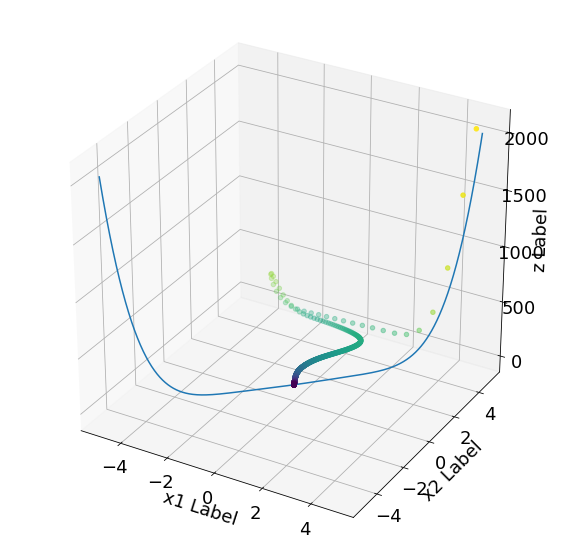

In [10]:
x_1_range = np.arange(-5, 5, 0.01)
x_2_range = np.arange(-5, 5, 0.01)
z_range = fn_loss(x_1_range,x_2_range)

font = {'size': 18}
matplotlib.rc('font', **font)

cmap = matplotlib.cm.get_cmap('viridis')
lst_loss_log = np.log(solver.loss_path - np.min(solver.loss_path) + 0.01)
normalize = matplotlib.colors.Normalize(vmin=min(lst_loss_log), 
                                        vmax=max(lst_loss_log))

colours = [cmap(normalize(value)) for value in lst_loss_log]

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111,projection='3d')
ax1.plot(x_1_range, x_2_range, z_range)
ax1.scatter(solver.x_path[:,0], solver.x_path[:,1], solver.loss_path, color=colours)
ax1.set_xlabel('x1 Label')
ax1.set_ylabel('x2 Label')
ax1.set_zlabel('z Label')

**Nesterov's Accelarated Gradient**

In [11]:
solver = gd_1d(fn_loss = fn_loss, fn_grad = fn_grad)
solver.nag(x_1_init = x_1_init, x_2_init = x_2_init, n_iter = n_iter, eta = eta, tol = tol, alpha = alpha)

Converged in 3517 steps.  Loss fn 0.298638442239499 achieved by x = -1.7475525075640805 and x_2 = 0.8737778307916483


Text(0.5, 0, 'z Label')

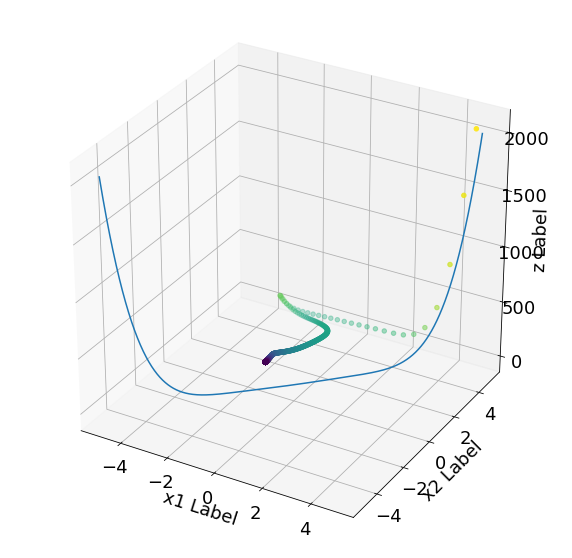

In [12]:
x_1_range = np.arange(-5, 5, 0.01)
x_2_range = np.arange(-5, 5, 0.01)
z_range = fn_loss(x_1_range,x_2_range)

font = {'size': 18}
matplotlib.rc('font', **font)

cmap = matplotlib.cm.get_cmap('viridis')
lst_loss_log = np.log(solver.loss_path - np.min(solver.loss_path) + 0.01)
normalize = matplotlib.colors.Normalize(vmin=min(lst_loss_log), 
                                        vmax=max(lst_loss_log))

colours = [cmap(normalize(value)) for value in lst_loss_log]

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111,projection='3d')
ax1.plot(x_1_range, x_2_range, z_range)
ax1.scatter(solver.x_path[:,0], solver.x_path[:,1], solver.loss_path, color=colours)
ax1.set_xlabel('x1 Label')
ax1.set_ylabel('x2 Label')
ax1.set_zlabel('z Label')

**Carry out analysis of step size vs no of steps to convergence**

In [13]:
solver_pv = gd_1d(fn_loss = fn_loss, fn_grad = fn_grad)
solver_momentum = gd_1d(fn_loss = fn_loss, fn_grad = fn_grad)
solver_nag = gd_1d(fn_loss = fn_loss, fn_grad = fn_grad)

solver_pv.pv_tabulation(x_1_init = x_1_init, x_2_init = x_2_init, n_iter = n_iter, eta = eta, tol = tol)
solver_momentum.momentum_tabulation(x_1_init = x_1_init, x_2_init = x_2_init, n_iter = n_iter, eta = eta, tol = tol, alpha = alpha)
solver_nag.nag_tabulation(x_1_init = x_1_init, x_2_init = x_2_init, n_iter = n_iter, eta = eta, tol = tol, alpha = alpha)

step = [5*1e-5,solver_pv.no_steps,solver_momentum.no_steps,solver_nag.no_steps]
step_path = []
step_path.append(step)

for i in np.linspace(5*1e-5,1e-3,50):
    solver_pv.pv_tabulation(x_1_init = x_1_init, x_2_init = x_2_init, n_iter = n_iter, eta = i, tol = tol)
    solver_momentum.momentum_tabulation(x_1_init = x_1_init, x_2_init = x_2_init, n_iter = n_iter, eta = i, tol = tol, alpha = alpha)
    solver_nag.nag_tabulation(x_1_init = x_1_init, x_2_init = x_2_init, n_iter = n_iter, eta = i, tol = tol, alpha = alpha)
    
    step[0] = i 
    step[1] = solver_pv.no_steps
    step[2] = solver_momentum.no_steps
    step[3] = solver_nag.no_steps
    
    
    step = [step[0],step[1],step[2],step[3]]
    step_path.append(step)

step_dataframe = pd.DataFrame(np.array(step_path) , columns = ["step_size","no_of_steps_pv","no_of_steps_momentum","no_of_steps_nag"])
step_dataframe

,step_size,no_of_steps_pv,no_of_steps_momentum,no_of_steps_nag
0,0.000050,178330.0,7430.0,7448.0
1,0.000069,128503.0,5174.0,5283.0
2,0.000089,100440.0,4933.0,4046.0
3,0.000108,82437.0,3906.0,3057.0
4,0.000128,69907.0,2672.0,3382.0
5,0.000147,60684.0,2702.0,2867.0
6,0.000166,53611.0,2412.0,2480.0
7,0.000186,48014.0,2163.0,2171.0
8,0.000205,43476.0,2019.0,1914.0
9,0.000224,39721.0,1305.0,1681.0


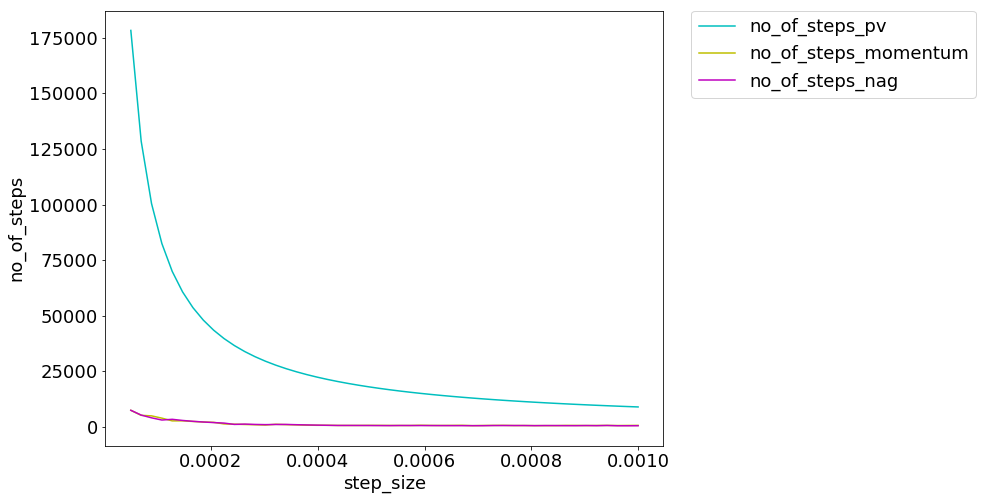

In [14]:
font = {'size': 18}
matplotlib.rc('font', **font)

fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(step_dataframe["step_size"],step_dataframe["no_of_steps_pv"], color = 'c')
ax1.plot(step_dataframe["step_size"],step_dataframe["no_of_steps_momentum"], color = 'y')
ax1.plot(step_dataframe["step_size"],step_dataframe["no_of_steps_nag"], color = 'm')
ax1.set_xlabel('step_size')
ax1.set_ylabel('no_of_steps')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Text(0, 0.5, 'no_of_steps')

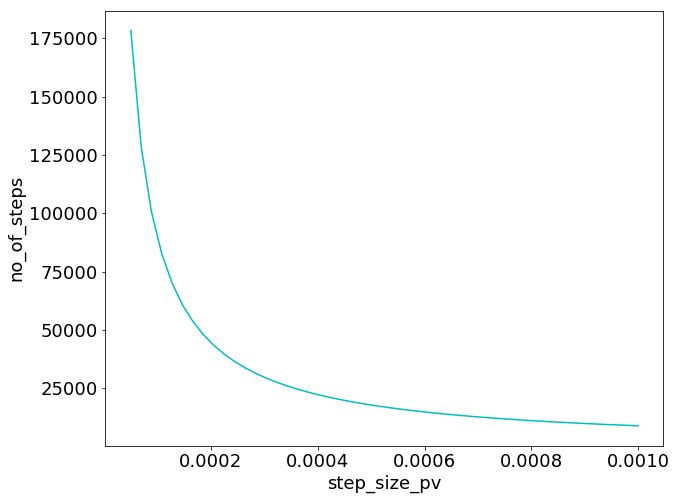

In [15]:
fig2 = plt.figure(figsize=(10, 8))
ax2 = fig2.add_subplot(1, 1, 1)
ax2.plot(step_dataframe["step_size"],step_dataframe["no_of_steps_pv"], color = 'c')
ax2.set_xlabel('step_size_pv')
ax2.set_ylabel('no_of_steps')

Text(0, 0.5, 'no_of_steps')

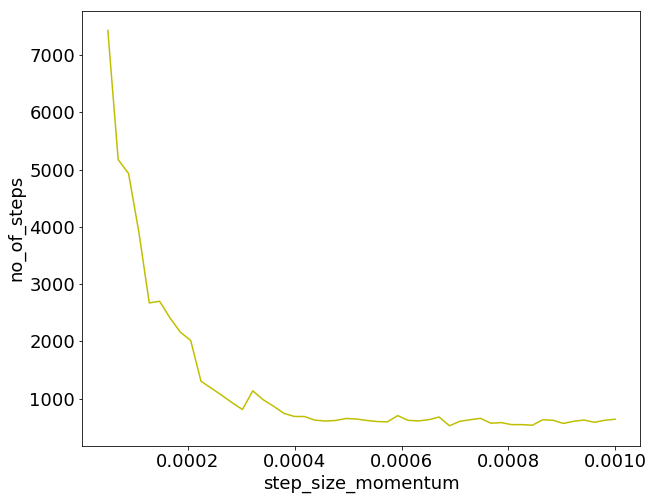

In [16]:
fig3 = plt.figure(figsize=(10, 8))
ax3 = fig3.add_subplot(1, 1, 1)
ax3.plot(step_dataframe["step_size"],step_dataframe["no_of_steps_momentum"], color = 'y')
ax3.set_xlabel('step_size_momentum')
ax3.set_ylabel('no_of_steps')

Text(0, 0.5, 'no_of_steps')

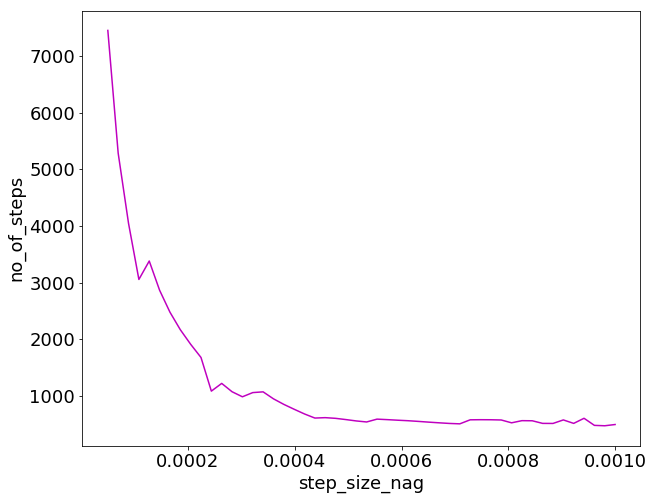

In [17]:
fig4 = plt.figure(figsize=(10, 8))
ax4 = fig4.add_subplot(1, 1, 1)
ax4.plot(step_dataframe["step_size"],step_dataframe["no_of_steps_nag"], color = 'm')
ax4.set_xlabel('step_size_nag')
ax4.set_ylabel('no_of_steps')